In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv('E:\Py codes\Github/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [12]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [18]:
X=df.drop(['custcat'],axis='columns')
y=df['custcat']
X=StandardScaler().fit_transform(X)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
model=KNeighborsClassifier(n_neighbors=9)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [35]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [36]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [37]:
train_accuracy=accuracy_score(y_train,y_pred_train)
test_accuracy=accuracy_score(y_test,y_pred_test)

In [38]:
train_accuracy

0.51375000000000004

In [39]:
test_accuracy

0.29499999999999998

In [42]:
ks=15
accu=[]
for i in range(1,ks+1):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_predi=neigh.predict(x_test)
    accu.append(accuracy_score(y_test,y_predi))

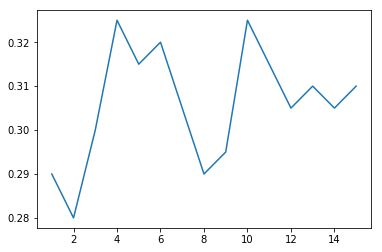

In [43]:
%matplotlib inline
xp=[i for i in range(1,ks+1)]
plt.plot(xp,accu)

In [ ]:
#accuracy is high at k=4 and k=10